<div style="background-color: #FFFACD; padding: 20px; border-radius: 10px; text-align: center;">
  <strong style="font-size: 32px; color: #000000;">Exploration des Opportunités Internationales pour 'La Poule qui Chante'</strong>
</div>


In [2]:
import pandas as pd


In [3]:

df_pop = pd.read_csv("Population_2000_2018.csv")
df_alim = pd.read_csv("DisponibiliteAlimentaire_2017.csv")

In [4]:
df_pop.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

In [5]:
df_alim.head()

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

<h2 style="color: #000000; background-color: #FFFFFF; padding: 10px;">Étape 1 : <strong>Analyse PESTEL pour définir nos variables</strong></h2>


In [7]:
# Filtrer la population pour l’année 2017---------------------------> variable 1 "Démographique"
df_pop_2017 = df_pop[df_pop["Année"] == 2017][["Zone", "Valeur"]]
df_pop_2017 = df_pop_2017.rename(columns={"Valeur": "Population_2017"})
df_pop_2017.head()

Zone  Population_2017
17     Afghanistan        36296.113
36  Afrique du Sud        57009.756
55         Albanie         2884.169
74         Algérie        41389.189
93       Allemagne        82658.409

In [8]:
# Liste de types d’éléments disponibles dans les données FAO
df_alim["Élément"].unique()


array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [9]:
# Extraire les protéines issues de la volaille (en g/personne/jour) ----------> variable 2 "Nutritionnel / Socioculturel"
proteine_volaille = df_alim[
    (df_alim["Élément"] == "Disponibilité de protéines en quantité (g/personne/jour)") &
    (df_alim["Produit"].str.lower().str.contains("volaille"))
][["Zone", "Valeur"]].rename(columns={"Valeur": "Proteines_volaille"})

proteine_volaille.head()

Zone  Proteines_volaille
660      Afghanistan                0.54
1715  Afrique du Sud               14.11
2722         Albanie                6.26
3783         Algérie                1.97
4883       Allemagne                7.96

In [10]:
# Extraire les importations de volaille (quantité en milliers de tonnes)-------> variable 3 "Économique / Commercial"
importations_volaille = df_alim[
    (df_alim["Élément"] == "Importations - Quantité") &
    (df_alim["Produit"].str.lower().str.contains("volaille"))
][["Zone", "Valeur"]].rename(columns={"Valeur": "Importations_volaille"})

importations_volaille.head()

Zone  Importations_volaille
652      Afghanistan                   29.0
1705  Afrique du Sud                  514.0
2714         Albanie                   38.0
3773         Algérie                    2.0
4874       Allemagne                  842.0

In [11]:
# Extraire les exportations de volaille (quantité en milliers de tonnes) --------> variable 4 "Commercial"
exportations_volaille = df_alim[
    (df_alim["Élément"] == "Exportations - Quantité") &
    (df_alim["Produit"].str.lower().str.contains("volaille"))
][["Zone", "Valeur"]].rename(columns={"Valeur": "Exportations_volaille"})

exportations_volaille.head()

Zone  Exportations_volaille
1707  Afrique du Sud                   63.0
2716         Albanie                    0.0
3775         Algérie                    0.0
4876       Allemagne                  646.0
5936          Angola                    0.0

In [12]:
# Extraire la disponibilité alimentaire totale en Kcal/personne/jour (tous produits confondus) 
#------------------> variable 5 "Nutritionnel"
kcal_total = df_alim[
    df_alim["Élément"] == "Disponibilité alimentaire (Kcal/personne/jour)"
][["Zone", "Valeur"]].groupby("Zone", as_index=False).sum()

kcal_total = kcal_total.rename(columns={"Valeur": "Kcal_total"})

kcal_total.head()

Zone  Kcal_total
0     Afghanistan      1997.0
1  Afrique du Sud      2987.0
2         Albanie      3400.0
3         Algérie      3345.0
4       Allemagne      3559.0

In [13]:
# Fusion de tous les variables
df_merge = (
    df_pop_2017
    .merge(proteine_volaille, on="Zone", how="left")
    .merge(importations_volaille, on="Zone", how="left")
    .merge(exportations_volaille, on="Zone", how="left")
    .merge(kcal_total, on="Zone", how="left")
)

In [14]:
df_merge.head()

Zone  Population_2017  Proteines_volaille  Importations_volaille  \
0     Afghanistan        36296.113                0.54                   29.0   
1  Afrique du Sud        57009.756               14.11                  514.0   
2         Albanie         2884.169                6.26                   38.0   
3         Algérie        41389.189                1.97                    2.0   
4       Allemagne        82658.409                7.96                  842.0   

   Exportations_volaille  Kcal_total  
0                    NaN      1997.0  
1                   63.0      2987.0  
2                    0.0      3400.0  
3                    0.0      3345.0  
4                  646.0      3559.0

In [15]:
#les valeurs manquantes dans le tableau final
df_merge.isnull().sum()


Zone                       0
Population_2017            0
Proteines_volaille        64
Importations_volaille     66
Exportations_volaille    101
Kcal_total                64
dtype: int64

In [16]:
# Remplacer les valeurs manquantes par 0
df_merge_propre = df_merge.fillna(0)

df_merge_propre.isnull().sum()

Zone                     0
Population_2017          0
Proteines_volaille       0
Importations_volaille    0
Exportations_volaille    0
Kcal_total               0
dtype: int64

In [17]:
print(df_merge_propre["Zone"].unique())

['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Anguilla' 'Antigua-et-Barbuda' 'Antilles néerlandaises (ex)'
 'Arabie saoudite' 'Argentine' 'Arménie' 'Aruba' 'Australie' 'Autriche'
 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bangladesh' 'Barbade' 'Bélarus'
 'Belgique' 'Belize' 'Bénin' 'Bermudes' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Bonaire, Saint-Eustache et Saba'
 'Bosnie-Herzégovine' 'Botswana' 'Brésil' 'Brunéi Darussalam' 'Bulgarie'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada'
 'Chili' 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, continentale' 'Chine, Taiwan Province de' 'Chypre' 'Colombie'
 'Comores' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba' 'Curaçao'
 'Danemark' 'Djibouti' 'Dominique' 'Égypte' 'El Salvador'
 'Émirats arabes unis' 'Équateur' 'Érythrée' 'Espagne' 'Estonie'
 'Eswatini' "États-Unis d'Amérique" 'Éthiopie' 'Fédération de Russie'
 'Fidji' 'Finlande' 'France' 'Gabon' 'Gambie' 'Géorgie

In [18]:
# Harmonisation des noms de pays 

df_merge_propre["Zone"] = df_merge_propre["Zone"].replace({
    "Chine, continentale": "Chine",
    "États-Unis d'Amérique": "États-Unis"
})

<h2 style="color: #000000; background-color: #008000; padding: 10px;">Autres données à explorer</h2>


In [20]:
!pip install xlrd

In [21]:

df_pib = pd.read_excel("Pib_hab.xls")

df_stab = pd.read_excel("stabilite_politique.xlsx")

df_liberte = pd.read_csv("liberte_commerciale.csv")


<h3 style="color: #000000; background-color: #F5F5DC; padding: 10px;">1. Liberté commerciale (6e variable : légal/commercial)</h3>


In [23]:
# fltrage colonnes utiles
df_liberte = df_liberte[["Country", "Trade Freedom"]]


In [24]:
# Traduction des noms de pays en francais 

import pycountry

def get_iso(pays):
    try:
        return pycountry.countries.lookup(pays).alpha_3
    except:
        return None

df_liberte["Code_iso"] = df_liberte["Country"].apply(get_iso)


In [25]:
# Mapper vers noms français

df_pib["Code_iso"] = df_pib["Zone"].apply(get_iso)
dico_iso_to_fr = df_pib.set_index("Code_iso")["Zone"].to_dict()

df_liberte["Zone"] = df_liberte["Code_iso"].map(dico_iso_to_fr)


In [26]:
#  Dictionnaire de pays non reconnus automatiquement
complements = {
    "Albania": "Albanie",
    "Algeria": "Algérie",
    "Argentina": "Argentine",
    "Armenia": "Arménie",
    "Australia": "Australie",
    "Austria": "Autriche",
    "Azerbaijan": "Azerbaïdjan",
    "Bahrain": "Bahreïn",
    "Barbados": "Barbade",
    "Belarus": "Bélarus",
    "Belgium": "Belgique",
    "Benin": "Bénin",
    "Bhutan": "Bhoutan",
    "Bolivia": "Bolivie",
    "Bosnia and Herzegovina": "Bosnie-Herzégovine",
    "Brazil": "Brésil",
    "Bulgaria": "Bulgarie",
    "Cambodia": "Cambodge",
    "Cameroon": "Cameroun",
    "Canada": "Canada",
    "Chile": "Chili",
    "China": "Chine",
    "Colombia": "Colombie",
    "Czech Republic": "Tchéquie",
    "Denmark": "Danemark",
    "Dominican Republic": "République dominicaine",
    "Ecuador": "Équateur",
    "Egypt": "Égypte",
    "Estonia": "Estonie",
    "Ethiopia": "Éthiopie",
    "Finland": "Finlande",
    "France": "France",
    "Germany": "Allemagne",
    "Greece": "Grèce",
    "Guinea": "Guinée",
    "Hungary": "Hongrie",
    "Iceland": "Islande",
    "India": "Inde",
    "Indonesia": "Indonésie",
    "Iran": "Iran (République islamique d')",
    "Ireland": "Irlande",
    "Israel": "Israël",
    "Italy": "Italie",
    "Japan": "Japon",
    "Jordan": "Jordanie",
    "Kenya": "Kenya",
    "Kuwait": "Koweït",
    "Latvia": "Lettonie",
    "Lebanon": "Liban",
    "Libya": "Libye",
    "Lithuania": "Lituanie",
    "Malaysia": "Malaisie",
    "Malta": "Malte",
    "Mexico": "Mexique",
    "Morocco": "Maroc",
    "Netherlands": "Pays-Bas",
    "New Zealand": "Nouvelle-Zélande",
    "Nigeria": "Nigéria",
    "Norway": "Norvège",
    "Pakistan": "Pakistan",
    "Peru": "Pérou",
    "Philippines": "Philippines",
    "Poland": "Pologne",
    "Portugal": "Portugal",
    "Romania": "Roumanie",
    "Russia": "Fédération de Russie",
    "Saudi Arabia": "Arabie saoudite",
    "Senegal": "Sénégal",
    "Serbia": "Serbie",
    "Singapore": "Singapour",
    "Slovakia": "Slovaquie",
    "Slovenia": "Slovénie",
    "South Africa": "Afrique du Sud",
    "South Korea": "Corée du Sud",
    "Spain": "Espagne",
    "Sweden": "Suède",
    "Switzerland": "Suisse",
    "Thailand": "Thaïlande",
    "Tunisia": "Tunisie",
    "Turkey": "Turquie",
    "Ukraine": "Ukraine",
    "United Arab Emirates": "Émirats arabes unis",
    "United Kingdom": "Royaume-Uni",
    "United States": "États-Unis",
    "Vietnam": "Viet Nam",
    "Zambia": "Zambie"
}


In [27]:
#mapping complementaire 
df_liberte["Zone"] = df_liberte["Zone"].fillna(df_liberte["Country"].map(complements))


In [28]:
df_liberte_final = df_liberte[["Zone", "Trade Freedom"]].dropna(subset=["Zone"])
df_liberte_final = df_liberte_final.rename(columns={"Trade Freedom": "Liberte_commerciale"})
df_liberte_final = df_liberte_final.groupby("Zone", as_index=False).mean()
df_liberte_final

Zone  Liberte_commerciale
0            Afghanistan                  NaN
1         Afrique du Sud                 68.4
2                Albanie                 83.4
3                Algérie                 57.4
4              Allemagne                 79.6
..                   ...                  ...
128               Égypte                 60.2
129  Émirats arabes unis                 78.4
130             Équateur                 67.2
131           États-Unis                 75.6
132             Éthiopie                 57.4

[133 rows x 2 columns]

<h3 style="color: #000000; background-color: #F5F5DC; padding: 10px;">2. PIB par habitant (7e variable : économique)</h3>


In [30]:
df_pib

Zone Code pays       PIB/Hab Code_iso
0             Aruba       ABW  37524.928478      ABW
1       Afghanistan       AFG   2335.795862      AFG
2            Angola       AGO   6992.728834      AGO
3           Albanie       ALB  12771.003793     None
4           Andorre       AND  53084.863964     None
..              ...       ...           ...      ...
259          Kosovo       XKX   9380.940073     None
260  Yémen, Rép. du       YEM           NaN     None
261  Afrique du Sud       ZAF  13738.438585     None
262          Zambie       ZMB   3391.627685     None
263        Zimbabwe       ZWE   7045.357426      ZWE

[264 rows x 4 columns]

In [31]:
#colonnes utiles
df_pib = df_pib[["Zone", "PIB/Hab"]].rename(columns={"PIB/Hab": "PIB_hab_PPA"})

In [32]:
# NaN et doublons 
df_pib = df_pib.dropna(subset=["Zone", "PIB_hab_PPA"])
df_pib = df_pib.drop_duplicates()

In [33]:
# grouper par pays 
df_pib_final = df_pib.groupby("Zone", as_index=False).mean()
df_pib_final 

Zone   PIB_hab_PPA
0                                          Afghanistan   2335.795862
1                      Afrique du Nord et Moyen-Orient  16379.161805
2        Afrique du Nord et Moyen-Orient (BIRD et IDA)  10879.575142
3    Afrique du Nord et Moyen-Orient (hors revenu é...  10824.885803
4                                       Afrique du Sud  13738.438585
..                                                 ...           ...
240                                         Îles Féroé  56413.983485
241                                      Îles Marshall   4719.313049
242                                       Îles Salomon   2454.044224
243                            Îles Turques-et-Caïques  25851.008607
244                                  Îles Vierges (EU)  33893.550182

[245 rows x 2 columns]

<h3 style="color: #000000; background-color: #F5F5DC; padding: 10px;">3. Stabilité politique (8e variable : politique)</h3>


In [35]:
# traduction pays en fr

def get_iso(pays):
    try:
        return pycountry.countries.lookup(pays).alpha_3
    except:
        return None

df_stab["Code_iso"] = df_stab["Zone"].apply(get_iso)


In [36]:
# dictionnaire

df_pib["Code_iso"] = df_pib["Zone"].apply(get_iso)
dico_iso_to_fr = df_pib.set_index("Code_iso")["Zone"].to_dict()


In [37]:
# mapping

df_stab["Zone"] = df_stab["Code_iso"].map(dico_iso_to_fr)


In [38]:
# complement dic

complements_iso_to_fr = {
    "ALB": "Albanie", "DZA": "Algérie", "ASM": "Samoa américaines", "AND": "Andorre",
    "AIA": "Anguilla", "ATG": "Antigua-et-Barbuda", "ARG": "Argentine", "ARM": "Arménie",
    "AUS": "Australie", "AUT": "Autriche", "AZE": "Azerbaïdjan", "BHR": "Bahreïn",
    "BRB": "Barbade", "BLR": "Bélarus", "BEL": "Belgique", "BEN": "Bénin", "BMU": "Bermudes",
    "BTN": "Bhoutan", "BOL": "Bolivie", "BIH": "Bosnie-Herzégovine", "BRA": "Brésil",
    "BRN": "Brunéi Darussalam", "BGR": "Bulgarie", "KHM": "Cambodge", "CMR": "Cameroun",
    "CYM": "Îles Caïmans", "CAF": "République centrafricaine", "TCD": "Tchad", "CHL": "Chili",
    "CHN": "Chine", "COL": "Colombie", "COK": "Îles Cook", "HRV": "Croatie", "CUB": "Cuba",
    "CYP": "Chypre", "CZE": "Tchéquie", "DNK": "Danemark", "DMA": "Dominique",
    "DOM": "République dominicaine", "ECU": "Équateur", "EGY": "Égypte", "ERI": "Érythrée",
    "EST": "Estonie", "ETH": "Éthiopie", "FJI": "Fidji", "FIN": "Finlande", "FRA": "France",
    "GUF": "Guyane française", "GEO": "Géorgie", "DEU": "Allemagne", "GHA": "Ghana",
    "GRC": "Grèce", "GRD": "Grenade", "GUM": "Guam", "GIN": "Guinée", "GNB": "Guinée-Bissau",
    "HTI": "Haïti", "HUN": "Hongrie", "ISL": "Islande", "IND": "Inde", "IDN": "Indonésie",
    "IRL": "Irlande", "ISR": "Israël", "ITA": "Italie", "JAM": "Jamaïque", "JPN": "Japon",
    "JOR": "Jordanie", "KWT": "Koweït", "KGZ": "Kirghizistan", "LVA": "Lettonie",
    "LBN": "Liban", "LBR": "Libéria", "LBY": "Libye", "LIE": "Liechtenstein",
    "LTU": "Lituanie", "MYS": "Malaisie", "MLT": "Malte", "MEX": "Mexique", "MCO": "Monaco",
    "MNG": "Mongolie", "MNE": "Monténégro", "NAM": "Namibie", "NPL": "Népal",
    "NLD": "Pays-Bas", "NZL": "Nouvelle-Zélande", "NGA": "Nigéria", "NIU": "Niue",
    "MKD": "Macédoine du Nord", "NOR": "Norvège", "PLW": "Palaos", "PNG": "Papouasie-Nouvelle-Guinée",
    "PER": "Pérou", "POL": "Pologne", "PRI": "Porto Rico", "ROU": "Roumanie", "RUS": "Fédération de Russie",
    "SMR": "Saint-Marin", "STP": "Sao Tomé-et-Principe", "SAU": "Arabie saoudite",
    "SEN": "Sénégal", "SRB": "Serbie", "SGP": "Singapour", "SVK": "Slovaquie",
    "SVN": "Slovénie", "SLB": "Îles Salomon", "SOM": "Somalie", "ZAF": "Afrique du Sud",
    "ESP": "Espagne", "SDN": "Soudan", "SWE": "Suède", "CHE": "Suisse", "SYR": "Syrie",
    "TJK": "Tadjikistan", "THA": "Thaïlande", "TUN": "Tunisie", "TKM": "Turkménistan",
    "UGA": "Ouganda", "ARE": "Émirats arabes unis", "GBR": "Royaume-Uni", "USA": "États-Unis",
    "UZB": "Ouzbékistan", "ZMB": "Zambie"
}


In [39]:
# mapping
df_stab["Zone"] = df_stab["Code_iso"].map(complements_iso_to_fr)


In [40]:
# filtrage

df_stab_filtered = df_stab[
    df_stab["série Name"] == "Political Stability and Absence of Violence/Terrorism: Estimate"
]

df_stab_filtered = df_stab_filtered[["Zone", "Stabilité_politique"]].dropna()
df_stab_final = df_stab_filtered.groupby("Zone", as_index=False).mean().rename(columns={
    "Stabilité_politique": "Stabilite_politique"})


In [41]:
df_stab_final

Zone  Stabilite_politique
0    Afrique du Sud            -0.284804
1           Albanie             0.373771
2           Algérie            -0.919614
3         Allemagne             0.574381
4           Andorre             1.392890
..              ...                  ...
114        Érythrée            -0.733444
115      États-Unis             0.262138
116        Éthiopie            -1.677231
117    Îles Caïmans             1.162611
118    Îles Salomon             0.188089

[119 rows x 2 columns]

<h2 style="color: #000000; background-color: #FFFFFF; padding: 10px;">Etape 2 : Préparation et nettoyage</strong></h2>


In [43]:
# stabilité + liberté + pib

df_economie = df_liberte_final \
    .merge(df_stab_final, on="Zone", how="outer") \
    .merge(df_pib_final, on="Zone", how="outer")


In [44]:
# df_final 

df_final = pd.merge(df_merge_propre, df_economie, on="Zone", how="outer")


In [45]:
# au moins 7 variables non nulles sur 8

df_final_filtre = df_final.dropna(thresh=7).copy()

In [46]:
df_final_filtre

Zone  Population_2017  Proteines_volaille  \
0                Afghanistan        36296.113                0.54   
4             Afrique du Sud        57009.756               14.11   
8                    Albanie         2884.169                6.26   
9                    Algérie        41389.189                1.97   
10                 Allemagne        82658.409                7.96   
..                       ...              ...                 ...   
290                 Éthiopie       106399.924                0.04   
297               Îles Féroé           48.331                0.00   
299            Îles Marshall           58.058                0.00   
300             Îles Salomon          636.039                1.51   
301  Îles Turques-et-Caïques           37.115                0.00   

     Importations_volaille  Exportations_volaille  Kcal_total  \
0                     29.0                    0.0      1997.0   
4                    514.0                   63.0      2987.0   
8                     38.0                    0.0      3400.0   
9                      2.0                    0.0      3345.0   
10                   842.0                  646.0      3559.0   
..                     ...                    ...         ...   
290                    1.0                    0.0      2304.0   
297                    0.0                    0.0         0.0   
299                    0.0                    0.0         0.0   
300                    6.0                    0.0      2410.0   
301                    0.0                    0.0         0.0   

     Liberte_commerciale  Stabilite_politique   PIB_hab_PPA  
0                    NaN                  NaN   2335.795862  
4                   68.4            -0.284804  13738.438585  
8                   83.4             0.373771  12771.003793  
9                   57.4            -0.919614  13493.560749  
10                  79.6             0.574381  54110.253665  
..                   ...                  ...           ...  
290                 57.4            -1.677231   2004.747597  
297                  NaN                  NaN  56413.983485  
299                  NaN                  NaN   4719.313049  
300                  NaN             0.188089   2454.044224  
301                  NaN                  NaN  25851.008607  

[191 rows x 9 columns]

<h2 style="color: #000000; background-color: #FFFFFF; padding: 10px;">Etape 3 : Création des 3 variables calculées</strong></h2>

In [48]:
# Ratio Importations / Exportations de volaille
df_final_filtre["Ratio_import_export"] = df_final_filtre["Importations_volaille"] / (df_final_filtre["Exportations_volaille"] + 1)
# +1 pour éviter une division par 0

# PIB total en millions de dollars
df_final_filtre["PIB_total"] = df_final_filtre["PIB_hab_PPA"] * df_final_filtre["Population_2017"]


# 3. Ratio Protéines/Kcal
df_final_filtre["Ratio_proteines_kcal"] = df_final_filtre["Proteines_volaille"] / (df_final_filtre["Kcal_total"] + 1)


df_final_filtre[["Zone", "Ratio_import_export", "PIB_total", "Ratio_proteines_kcal"]].head()


Zone  Ratio_import_export     PIB_total  Ratio_proteines_kcal
0      Afghanistan            29.000000  8.478031e+07              0.000270
4   Afrique du Sud             8.031250  7.832250e+08              0.004722
8          Albanie            38.000000  3.683373e+07              0.001841
9          Algérie             2.000000  5.584875e+08              0.000589
10       Allemagne             1.301391  4.472667e+09              0.002236

<h2 style="color: #000000; background-color: #FFFFFF; padding: 10px;">Etape 4 : Exploration et description des données</strong></h2>

In [50]:
# selection des variables numeriques

colonnes_acp = [
    'Proteines_volaille',
    'Importations_volaille',
    'Exportations_volaille',
    'Kcal_total',
    'Population_2017',
    'Liberte_commerciale',
    'Stabilite_politique',
    'PIB_hab_PPA',
    'Ratio_import_export',
    'PIB_total',
    'Ratio_proteines_kcal']


In [51]:
# remplissage par MICE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=0)

# MICE sur les colonnes ACP
X = df_final_filtre[colonnes_acp]

# le modèle MICE
X_imputed = mice_imputer.fit_transform(X)

# DataFrame propre avec les valeurs imputées
df_final_rempli = df_final_filtre.copy()
df_final_rempli[colonnes_acp] = X_imputed

In [52]:
df_acp = df_final_rempli[colonnes_acp]

In [53]:
df_acp.describe()

Proteines_volaille  Importations_volaille  Exportations_volaille  \
count          191.000000             191.000000             191.000000   
mean             5.728743              67.869110              88.000000   
std              5.668239             160.246023             433.369698   
min              0.000000               0.000000               0.000000   
25%              0.760000               0.000000               0.000000   
50%              4.510000               9.000000               0.000000   
75%              9.105000              51.000000               7.500000   
max             27.870000            1069.000000            4223.000000   

        Kcal_total  Population_2017  Liberte_commerciale  Stabilite_politique  \
count   191.000000     1.910000e+02           191.000000           191.000000   
mean   2377.293194     3.738059e+04            71.722259             0.046800   
std    1163.442694     1.458688e+05             8.330121             0.764936   
min       0.000000     1.057300e+01            40.800000            -2.353576   
25%    2252.500000     1.211468e+03            67.028118            -0.375878   
50%    2726.000000     6.867061e+03            71.600000            -0.060652   
75%    3182.000000     2.301993e+04            79.600000             0.542048   
max    3770.000000     1.421022e+06            95.000000             2.327324   

         PIB_hab_PPA  Ratio_import_export     PIB_total  Ratio_proteines_kcal  
count     191.000000           191.000000  1.910000e+02            191.000000  
mean    21545.603397            15.741374  6.161435e+08              0.001917  
std     20773.679092            49.915096  2.241918e+09              0.001881  
min       761.269257             0.000000  4.805770e+04              0.000000  
25%      5262.013518             0.000000  2.146408e+07              0.000308  
50%     14796.628637             1.822222  9.067088e+07              0.001664  
75%     29115.390906             8.750000  3.140702e+08              0.002854  
max    114985.842240           470.000000  2.096059e+10              0.008471

In [54]:
print("Nombre de pays dans df_acp :", df_acp.shape[0])


Nombre de pays dans df_acp : 191


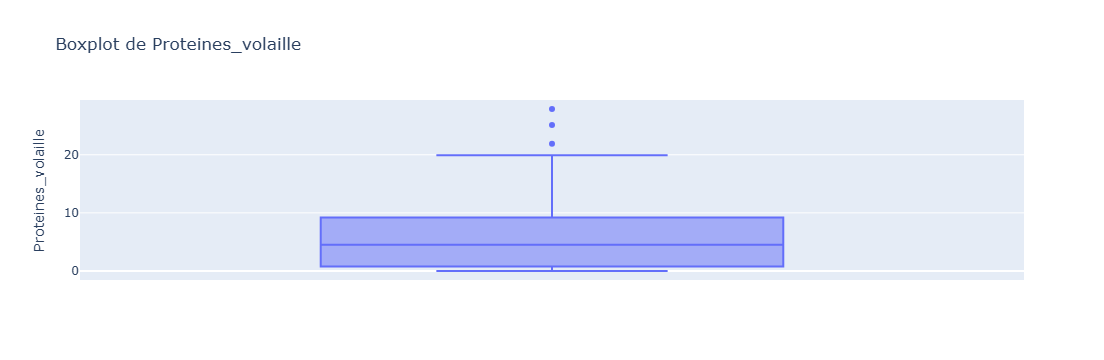

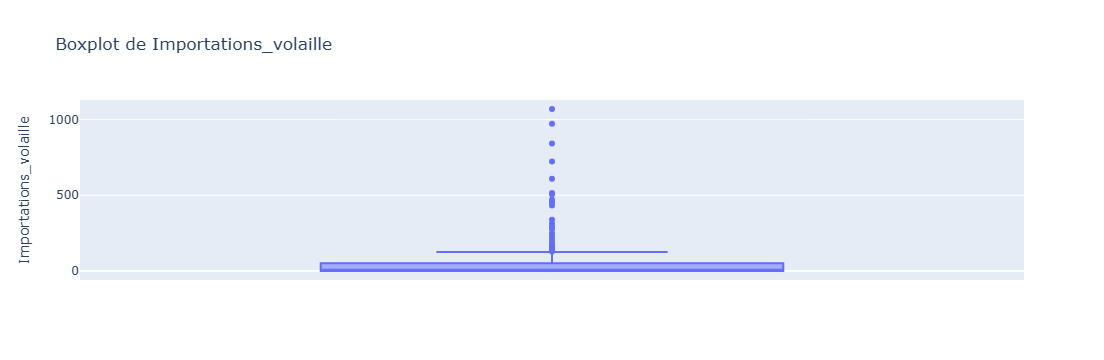

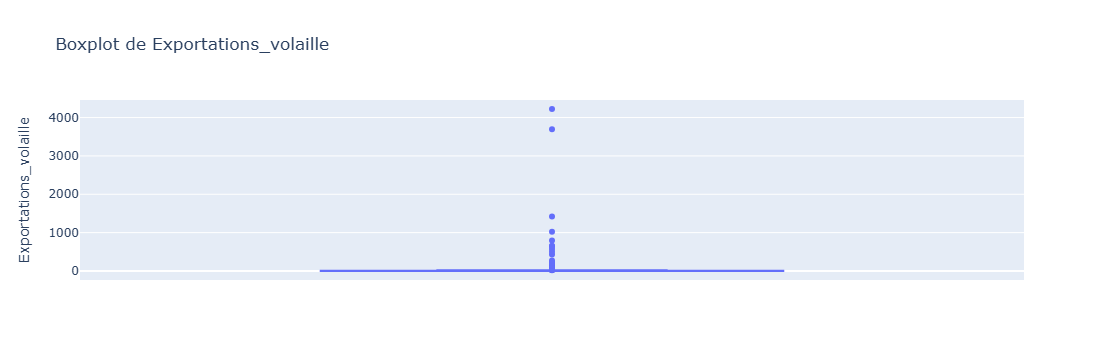

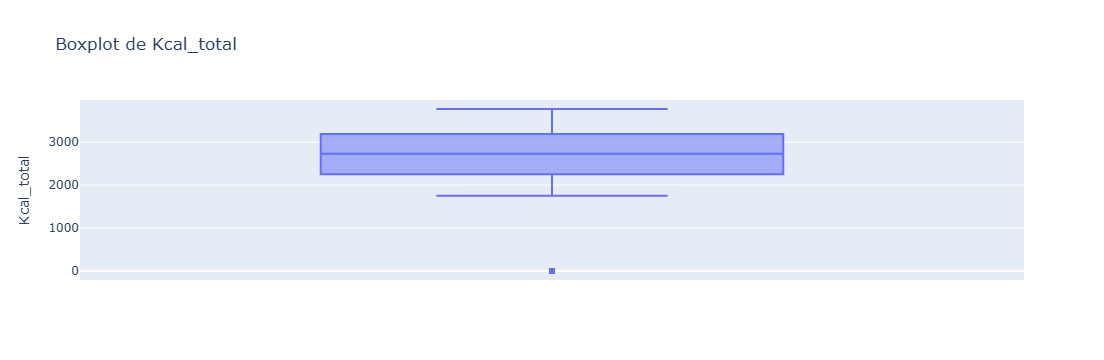

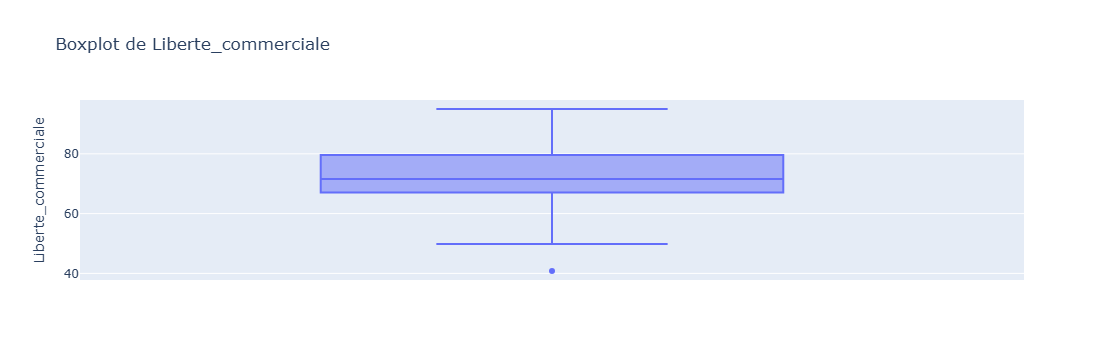

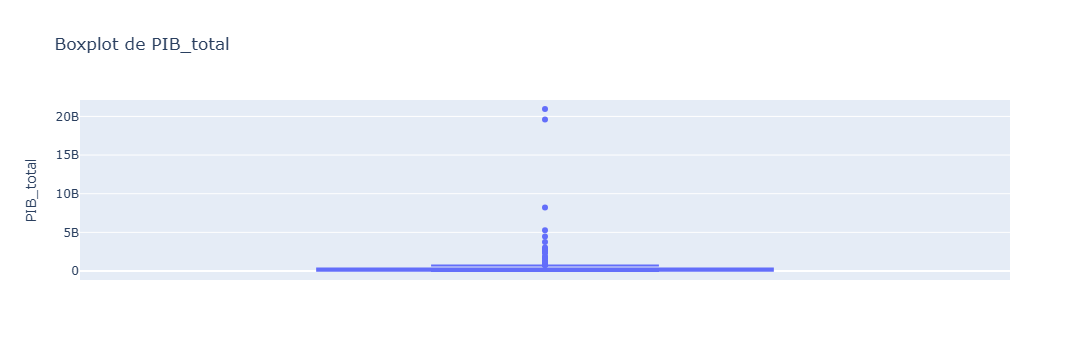

In [55]:
# outliers 

import plotly.express as px

for col in df_acp.columns:
    fig = px.box(df_acp, y=col, title=f"Boxplot de {col}") 
    fig.show()


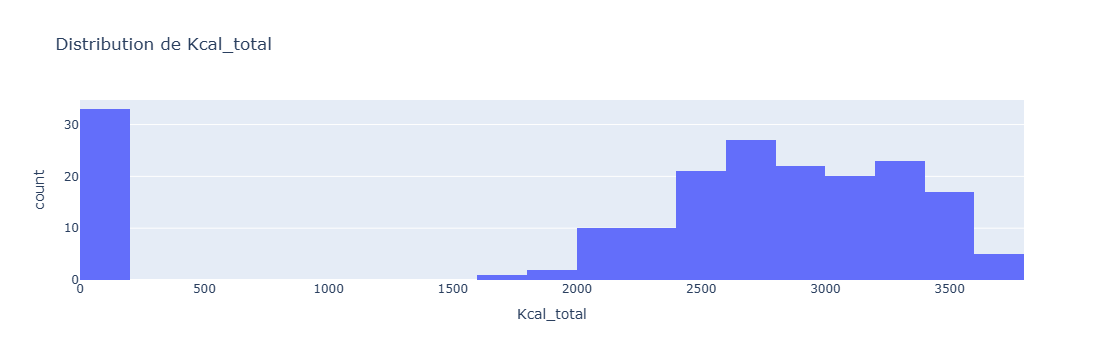

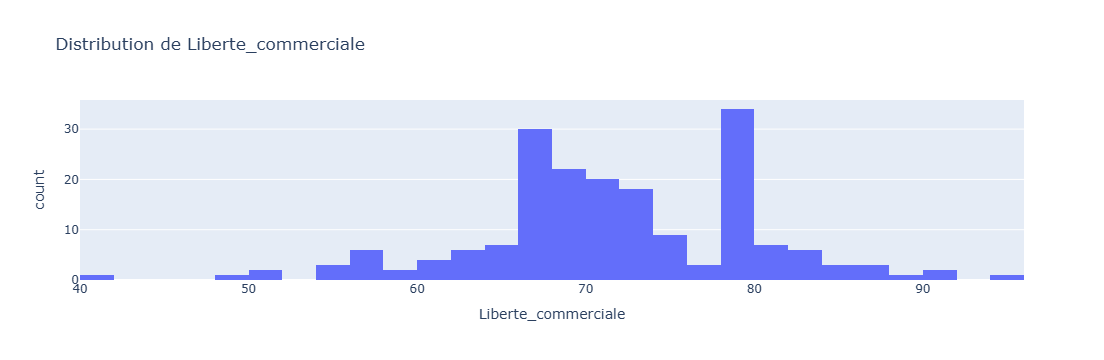

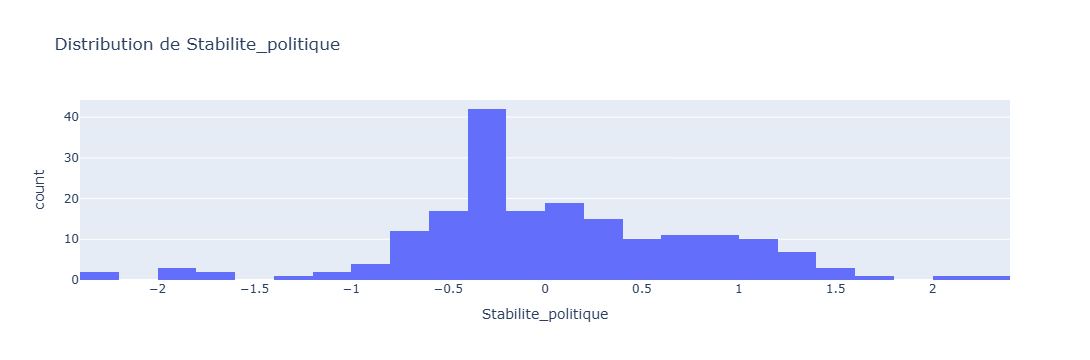

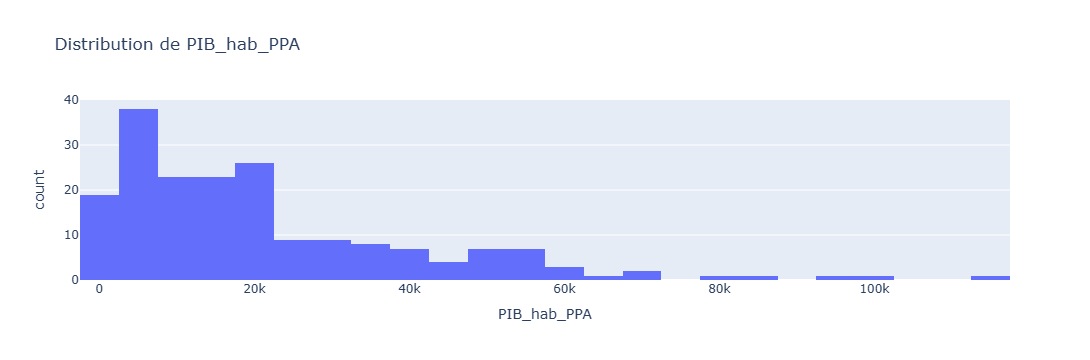

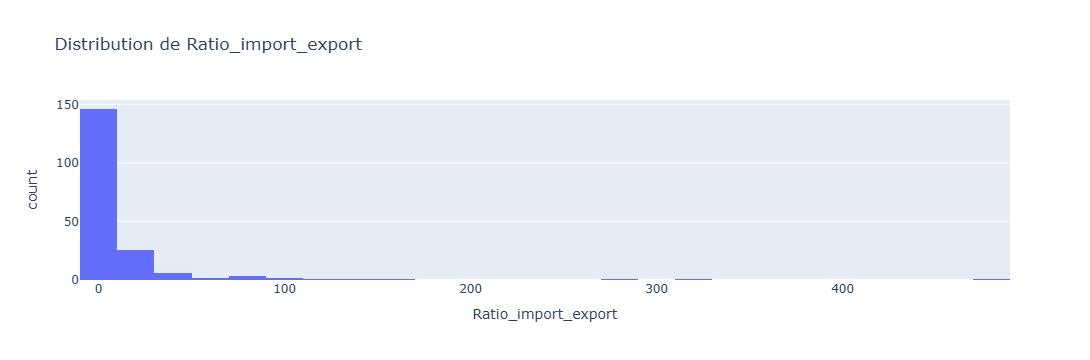

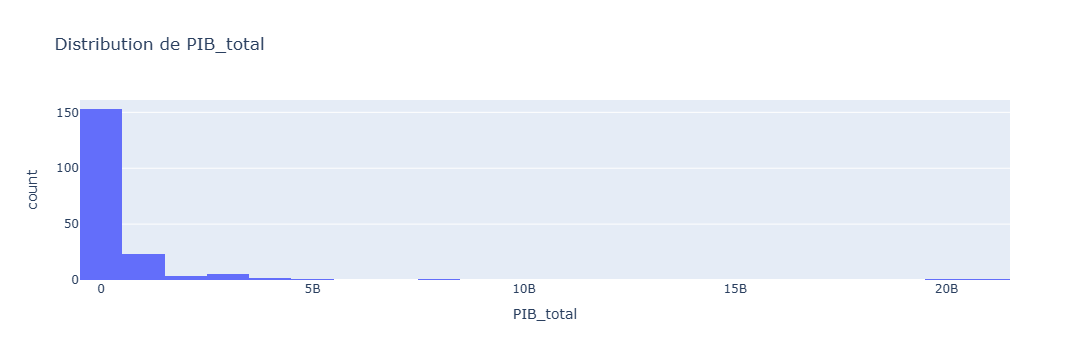

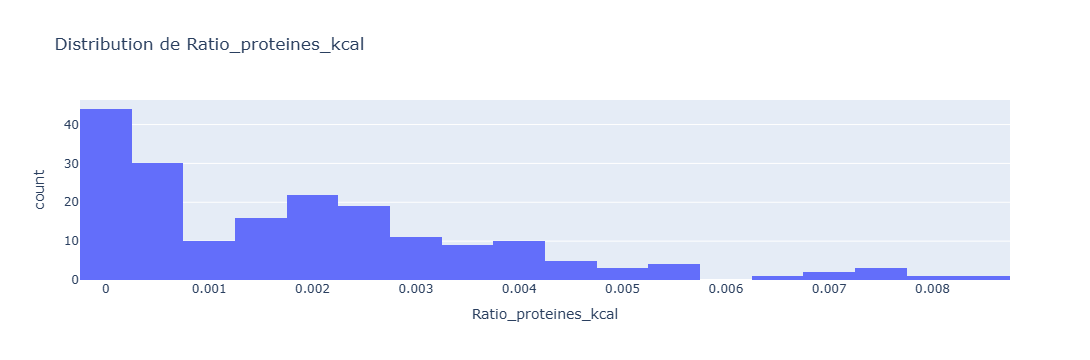

In [56]:
# distribution de nos variables 

for col in df_acp.columns:
    fig = px.histogram(df_acp, x=col, nbins=30, title=f"Distribution de {col}")
    fig.show()


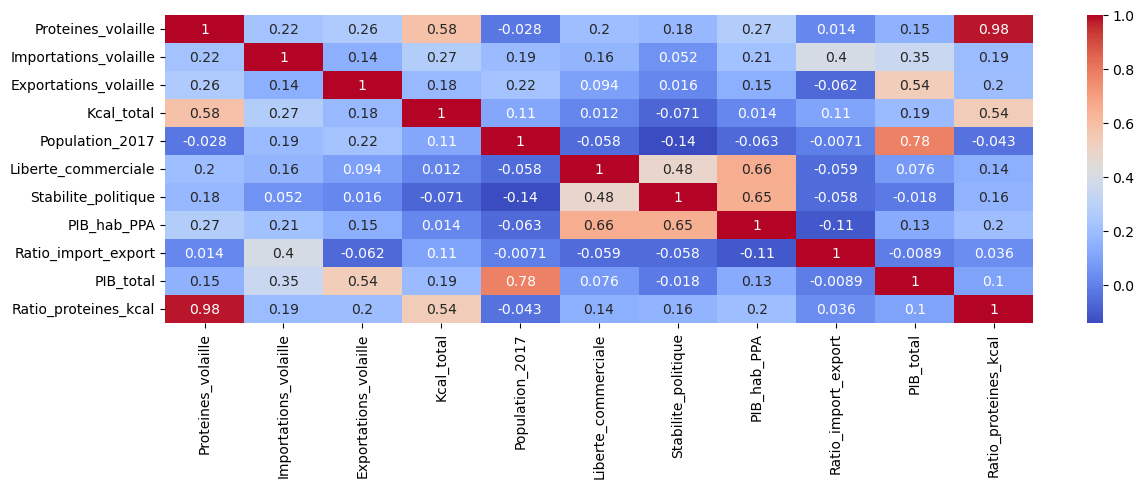

In [57]:
# Heatmap des Corrélation 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
sns.heatmap(df_acp.corr(), annot=True, cmap="coolwarm")
plt.show()


In [58]:
# PIB par habitant, liberté commerciale et stabilité politique ressortent comme les plus fortement corrélées entre elles
# la consommation de protéines de volaille est positivement liée à l’apport calorique total
# d’importation et d’exportation de volaille sont faiblement corrélées aux autres

<h2 style="color: #000000; background-color: #FFFFFF; padding: 10px;">Etape 4 : Sauvegarde en CSV</strong></h2>




In [60]:
# Récupérer les noms de pays pour les lignes encore présentes dans df_acp
pays = df_final_rempli.loc[df_acp.index, "Zone"]

In [61]:
df_acp.to_csv("df_acp.csv", index=False)
pays.to_csv("pays.csv", index=False)
